In [17]:
"Importing the Lib"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


In [18]:
# Reading the Data Set
Titanic=pd.read_csv("/Users/mohitr/Downloads/5. Titanic EDA- Data Analysis Project/DATASET/datasets/train.csv")

# Data Overview

In [19]:
# Overview Of Data
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Information About the Dataset__
- __SibSp__ = Number of siblings and spouses the passenger had aboard the Titanic. Sib → Siblings (brother, sister, stepbrother, stepsister), Sp → Spouse (husband, wife)

- __Parch__ = Number of parents and children the passenger had aboard the Titanic. Par → Parents (mother, father), Ch → Children (son, daughter, stepchildren)

- __Embarked__ = Port of Embarkation → the port where the passenger boarded the Titanic.It has 3 main values:
      (1. C → Cherbourg (France) , 2. Q → Queenstown (Ireland)  ,3.S → Southampton (England, most passengers boarded here))

In [20]:
Titanic.shape

(891, 12)

In [21]:
Titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
Titanic.rename(columns={'Pclass':"TravelClass"},inplace=True)

### Column Types

- __Numerical TYpe__: Age,Fare,PassengerId.
- __Categorical Type__: Survived,Pclass(TravelClass),Sex,SibSp,Parch,Embarked.
- __Mixed__ :Name,Ticket,Cabin.

In [24]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
TravelClass      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
'Null Filling'
# we can replace age with Mean
Titanic['Age']=Titanic['Age'].fillna(int(Titanic['Age'].mean()))
# we can replace cabin detials with 'Has Cabin'
Titanic['Cabin']=Titanic['Cabin'].fillna('Has Cabin')
# Embarked with 
Titanic['Embarked']=Titanic['Embarked'].fillna('Unknown')

### Univariate Analysis

Univariate Analysis Focuses on Analyzing each column in The dataset Independently.

- __Distribution Analysis__: The Distribution ofeach feature is examined to identify its shape ,central tendency and dispersion.

- __Identifying Potential issues__ : Univariate Analysis helps in identifying potential problems with the data such as outliers,skewness and missing values.

__Univarite Analysis on Age Column__

In [26]:
Titanic['Age'].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

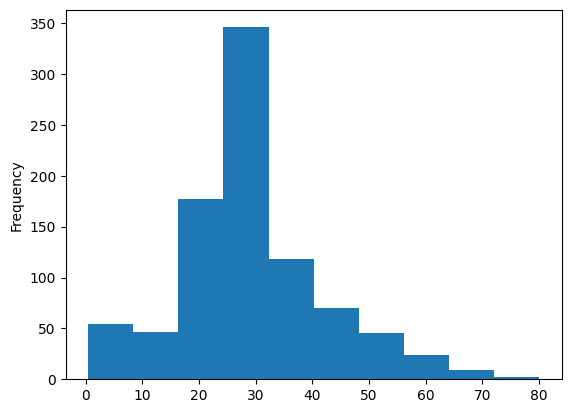

In [27]:
Titanic['Age'].plot(kind='hist')

<Axes: ylabel='Density'>

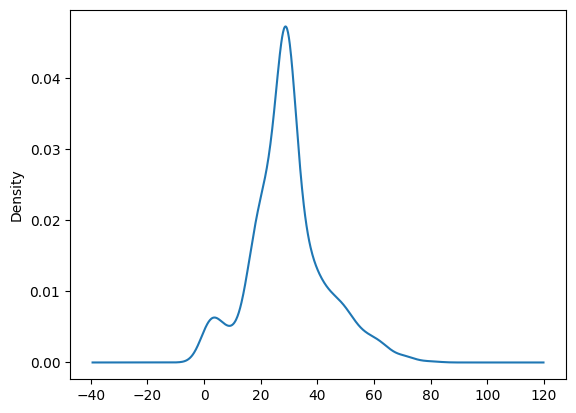

In [28]:
Titanic['Age'].plot(kind='kde')

In [29]:
# Skewness
Titanic['Age'].skew()

np.float64(0.4662676354258781)

<Axes: >

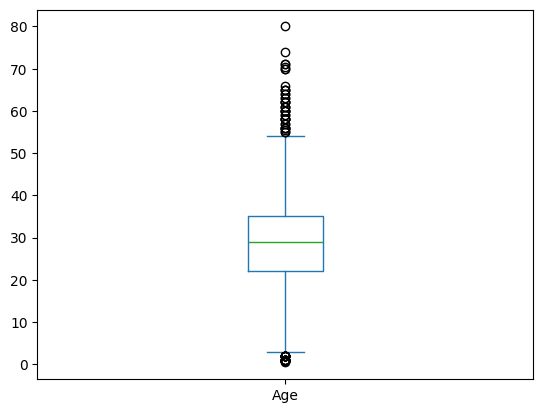

In [30]:
Titanic['Age'].plot(kind='box')

In [31]:
# almost age >65 are cosidered as Outliers so we can study about the Outliers
Titanic[Titanic['Age']>65]

,PassengerId,Survived,TravelClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,Has Cabin,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Has Cabin,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,Has Cabin,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,Has Cabin,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,Has Cabin,S


__Univariate analysis of Fare column__

***how many Dollars is payed for the Ticket.***

In [32]:
Titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

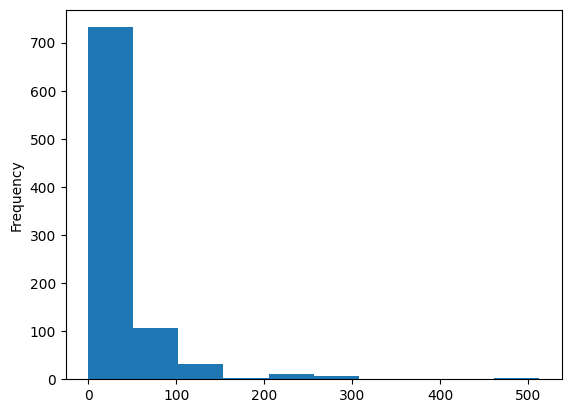

In [33]:
Titanic['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

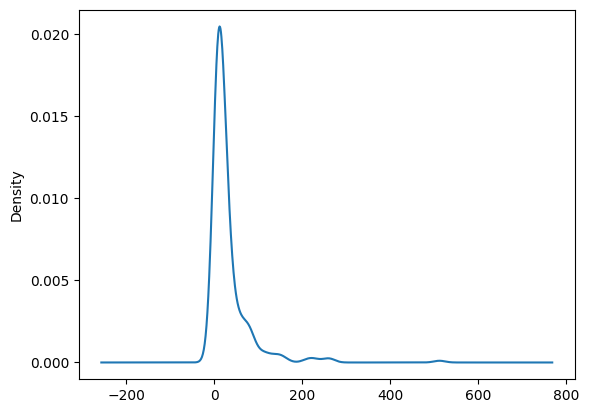

In [34]:
Titanic['Fare'].plot(kind='kde')

In [35]:
Titanic['Fare'].skew()
# highly Skewed we cannot run normal Machine Learning Algorithm

np.float64(4.787316519674893)

<Axes: >

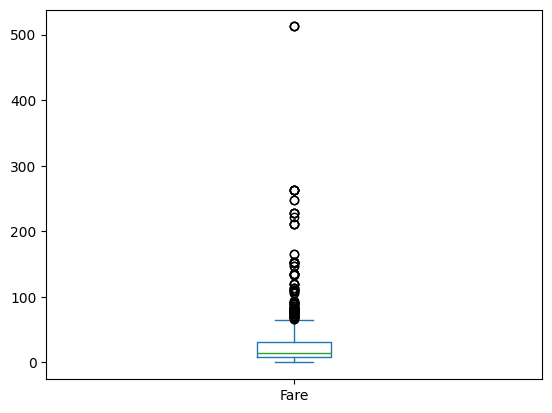

In [36]:
Titanic['Fare'].plot(kind='box')

In [37]:
# CHecking the Outliers 
Titanic[Titanic['Fare']>250]
# these persons pay more then 250 dollars for the titanic ticket

,PassengerId,Survived,TravelClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Has Cabin,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [38]:
# fare column
# For getting Individual fare
Ticket_valid_for_groupcount = Titanic.groupby("Ticket").agg({"Fare": "count"}).reset_index()
Ticket_valid_for_groupcount.rename(columns={"Fare": "TicketAsGroup"}, inplace=True)

# Merge the group count back into the Titanic DataFrame
Titanic = Titanic.merge(Ticket_valid_for_groupcount, on="Ticket", how="left")
Titanic['Fare_per_individual']=Titanic['Fare']/Titanic['TicketAsGroup']




In [39]:
Titanic.head()

,PassengerId,Survived,TravelClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketAsGroup,Fare_per_individual
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Has Cabin,S,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Has Cabin,S,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Has Cabin,S,1,8.0500


***Categorical Analysis***

- ***Descriptive Statistics***: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

- ***Visualizations***: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

- ***Missing Values***: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

- ***Conclusion***: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

***Survived Column***

In [40]:
Titanic['Survived'].value_counts()
# 1 means Survived
# 0 means Dead

Survived
0    549
1    342
Name: count, dtype: int64

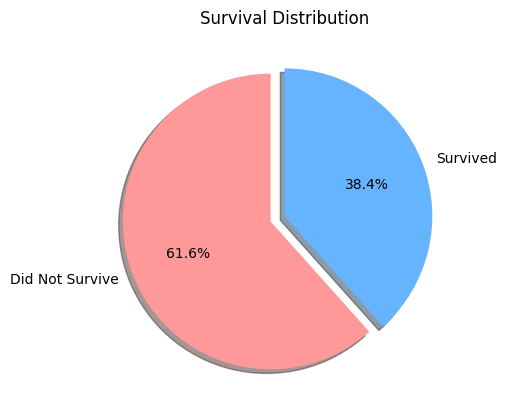

In [41]:
colors = ['#ff9999', '#66b3ff']
Titanic['Survived'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.1, 0),  
    labels=['Did Not Survive', 'Survived'],
    shadow=True
)
plt.title('Survival Distribution')
plt.ylabel('') 
plt.show()

***Pclass***

In [42]:
Titanic['TravelClass'].value_counts()

TravelClass
3    491
1    216
2    184
Name: count, dtype: int64

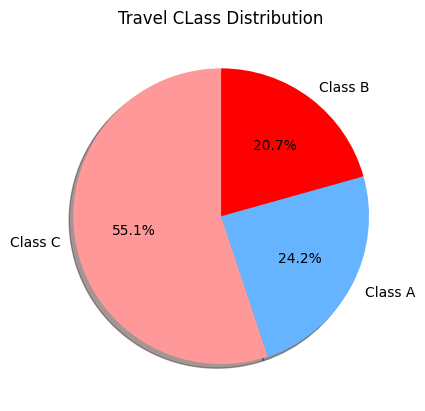

In [43]:
colors = ['#ff9999', '#66b3ff','Red']
Titanic['TravelClass'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    startangle=90,
    colors=colors,
    
    labels=['Class C', 'Class A',"Class B"],
    shadow=True
)
plt.title('Travel CLass Distribution')
plt.ylabel('') 
plt.show()

***Sex***

In [44]:
Titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

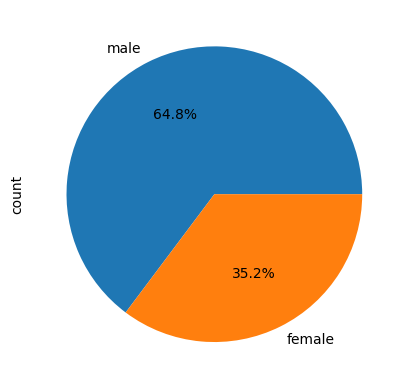

In [45]:
Titanic['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

***SibSp COlumn(How many SIblings and Spouse)***

In [46]:
Titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

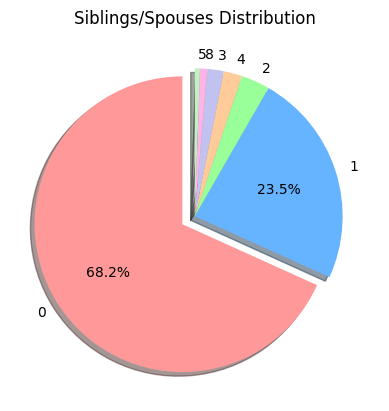

In [47]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

threshold = 5

def format_autopct(pct):
	return f'{pct:.1f}%' if pct > threshold else ''

Titanic['SibSp'].value_counts().plot(
	kind='pie',
	autopct=format_autopct,
	startangle=90,
	colors=colors,
	explode=[0.1 if i == Titanic['SibSp'].value_counts().idxmax() else 0 for i in Titanic['SibSp'].value_counts().index],
	shadow=True
)
plt.title('Siblings/Spouses Distribution')
plt.ylabel('') 
plt.show()

***Parch***

In [48]:
Titanic['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

***Embarked***

In [49]:
Titanic['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

<Axes: ylabel='count'>

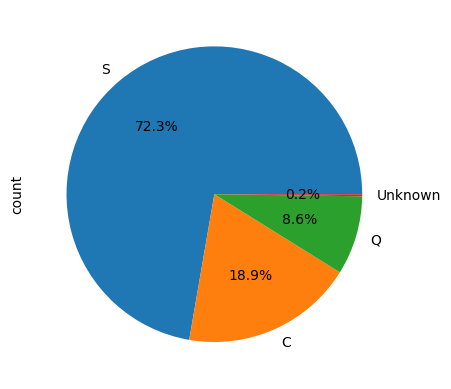

In [50]:
Titanic['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [51]:
"""Conclusions:
Age Column : 1. Age is Almost NOrmally DIsrtibuted
             2. Mostly 20% of values are missing but we treat it as mean

Fare Column : 1. Fare column is for groups and families(Group_Fare) (for eg. if family pay totally 80 dollars 
              Each family member shows the same amount) This is big problem beacause we need individual Fare
              So we have Fare_per_individual for each Person Fare
              2. Fare COlumn is Higlhy Skewed .
              3. 

Survived COlumn :
              1. Mostly the Peoples Die around 62%.

Sex COlumn :
              1. 64 % are Male Passengers

SIbSp Column:
             1.Mostly Peoples Travel ALone .  

SibSp and Parch can be Combined Both Describes Same thing Family SIze

             """



'Conclusions:\nAge Column : 1. Age is Almost NOrmally DIsrtibuted\n             2. Mostly 20% of values are missing but we treat it as mean\n\nFare Column : 1. Fare column is for groups and families(Group_Fare) (for eg. if family pay totally 80 dollars \n              Each family member shows the same amount) This is big problem beacause we need individual Fare\n              So we have Fare_per_individual for each Person Fare\n              2. Fare COlumn is Higlhy Skewed .\n              3. \n\nSurvived COlumn :\n              1. Mostly the Peoples Die around 62%.\n\nSex COlumn :\n              1. 64 % are Male Passengers\n\nSIbSp Column:\n             1.Mostly Peoples Travel ALone .  \n\nSibSp and Parch can be Combined Both Describes Same thing Family SIze\n\n             '

### ***Bivariate Analysis***

In [52]:
"""Select 2 cols

Understand type of relationship

Numerical - Numerical
a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEPlots
b. Check correlation coefficient to check linear relationship

Numerical - Categorical - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

Categorical - Categorical
a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
b. You can plots like heatmap, stacked barplots, treemaps

Write your conclusions"""

'Select 2 cols\n\nUnderstand type of relationship\n\nNumerical - Numerical\na. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEPlots\nb. Check correlation coefficient to check linear relationship\n\nNumerical - Categorical - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.\na. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots\n\nCategorical - Categorical\na. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.\nb. You can plots like heatmap, stacked barplots, treemaps\n\nWrite your conclusions'

***Survived Vs Other COlumn***

In [53]:
# Survived vs TravelClass
pd.crosstab(Titanic['Survived'],Titanic['TravelClass'],)

TravelClass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [54]:

pd.crosstab(Titanic['Survived'],Titanic['TravelClass'],normalize='columns')*100

TravelClass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='TravelClass', ylabel='Survived'>

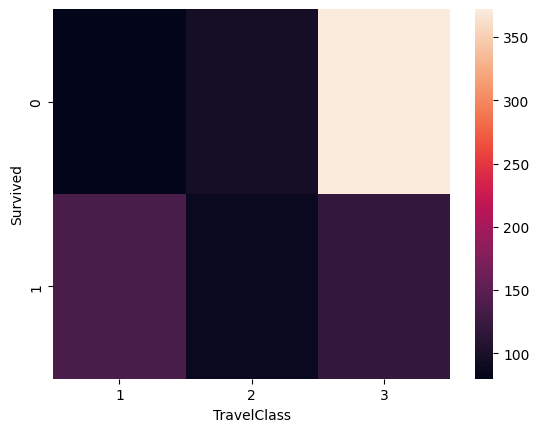

In [55]:
sns.heatmap(pd.crosstab(Titanic['Survived'],Titanic['TravelClass'],))

In [56]:
# Survived vs Sex
pd.crosstab(Titanic['Survived'],Titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [57]:

pd.crosstab(Titanic['Survived'],Titanic['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [58]:
# Survived vs Embarked

pd.crosstab(Titanic['Survived'],Titanic['Embarked'])

Embarked,C,Q,S,Unknown
Survived,,,,
0,75,47,427,0
1,93,30,217,2


In [59]:
# Survival Basically Depends on Embark location
pd.crosstab(Titanic['Survived'],Titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S,Unknown
Survived,,,,
0,44.642857,61.038961,66.304348,0.0
1,55.357143,38.961039,33.695652,100.0


In [60]:
# checking Embark with sex (because from starting we get that Females SUrvived more then males)
pd.crosstab(Titanic['Sex'],Titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S,Unknown
Sex,,,,
female,43.452381,46.753247,31.521739,100.0
male,56.547619,53.246753,68.478261,0.0


In [61]:
# According to travel Class With Embarked
pd.crosstab(Titanic['TravelClass'],Titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S,Unknown
TravelClass,,,,
1,50.595238,2.597403,19.720497,100.0
2,10.119048,3.896104,25.465839,0.0
3,39.285714,93.506494,54.813665,0.0


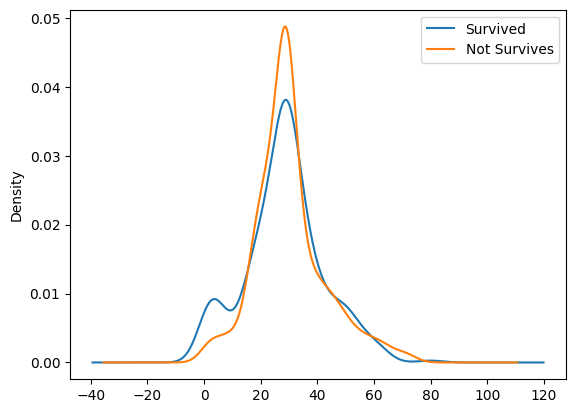

In [62]:
# Age Vs Survival
# we plot the kde plot for both Survied and notsuvived with age
Titanic[Titanic['Survived']==1]['Age'].plot(kind='kde',label='Survived')
Titanic[Titanic['Survived']==0]['Age'].plot(kind='kde',label='Not Survives')

plt.legend()
plt.show()

